# Cluster Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load dataset
from sklearn.datasets import load_iris
iris = load_iris()

df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# In clustering there is no need train test data

X = iris.data
y = iris.target    #(it not use in clsutering just for undertsaind) 

### APPLYING MODEL   K_MEAN CLUSTERING

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=42)
kmeans.fit(X)

labels = kmeans.labels_

centroids = kmeans.cluster_centers_


C:\Users\shahe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shahe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Now Lets Vizualize the Clsuters 

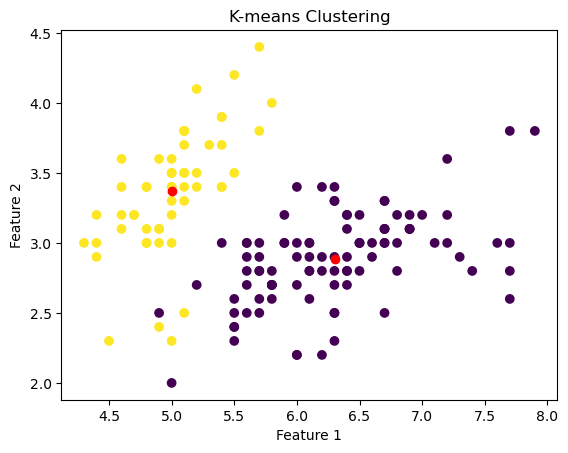

In [11]:
import matplotlib.pyplot as plt

# Scatter plot of the points colored by their assigned clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')

# Scatter plot for the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')

# Add labels and title
plt.title("K-means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Show the plot
plt.show()


### 1  Inertia  

In [7]:
print("Inertia (within-cluster sum of squre): ",kmeans.inertia_)

Inertia (within-cluster sum of squre):  152.34795176035792


### 2  Silhouette Score

In [9]:
from sklearn.metrics import silhouette_score

sil_avg = silhouette_score(X,labels)
print("Silhouette Score : ",sil_avg)

Silhouette Score :  0.6810461692117462


### 3 Purity Score

In [12]:
from sklearn.metrics import confusion_matrix

def purity_score(y_true,y_pred):
    cm = confusion_matrix(y_true,y_pred)
    
    return np.sum(np.max(cm,axis=1)) / np.sum(cm)

purity = purity_score(y, labels)
print("Cluster Purity:", purity)


Cluster Purity: 0.98
